<a href="https://colab.research.google.com/github/Suruchi264/NLP-DL-ML/blob/main/KNN_Classification_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K Nearest Neighbour Classifier

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000, # 1000 observations
    n_features=3, # 3 total features
     n_redundant=1,
    n_classes=2, # binary target/label
    random_state=999
)

Data generation


Meaning:

Imports make_classification to generate a synthetic dataset.
X will be a 1000x3 matrix (1000 samples, 3 features).
y will be a vector of 1000 binary labels (0 or 1).
n_redundant=1 means one feature is a linear combination of the others, introducing correlation.
random_state=999 ensures reproducibility.
Purpose:
To create a controlled, synthetic dataset for demonstrating KNN classification.

Mathematical Intuition:
Each row in X is a point in 3D space, and y assigns each point to one of two classes. The redundancy simulates real-world feature correlation.

In [3]:
X

array([[-0.33504974,  0.02852654,  1.16193084],
       [-1.37746253, -0.4058213 ,  0.44359618],
       [-1.04520026, -0.72334759, -3.10470423],
       ...,
       [-0.75602574, -0.51816111, -2.20382324],
       [ 0.56066316, -0.07335845, -2.15660348],
       [-1.87521902, -1.11380394, -4.04620773]])

Meaning:
Displays the feature matrix.

Purpose:
To inspect the generated data.

In [4]:
from sklearn.model_selection import train_test_split

Splitting the data

Meaning:

Imports the function to split data.
Splits data into 67% training and 33% testing sets.
Purpose:
To train the model on one part of the data and evaluate it on another, ensuring a fair assessment.

Mathematical Intuition:
Prevents overfitting by testing the model on unseen data.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

Meaning:

Imports the function to split data.
Splits data into 67% training and 33% testing sets.
Purpose:
To train the model on one part of the data and evaluate it on another, ensuring a fair assessment.

Mathematical Intuition:
Prevents overfitting by testing the model on unseen data.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto')
classifier.fit(X_train,y_train)

KNeighborsClassifier()

4. KNN Classifier Initialization and Training

Meaning:

Imports the KNN classifier.
Initializes it to use 5 nearest neighbors (n_neighbors=5).
algorithm='auto' lets scikit-learn choose the best algorithm for the data.
Fits (trains) the classifier on the training data.
Purpose:
To build a KNN model that can classify new points based on the majority class of their 5 nearest neighbors.

Mathematical Intuition:
For a new point, the algorithm:

Computes the distance (usually Euclidean) to all training points.
Finds the 5 closest points.
Assigns the class that is most common among those 5.


In [8]:
y_pred=classifier.predict(X_test)

Making the predictions


Meaning:
Predicts the class labels for the test set.

Purpose:
To see how well the model generalizes to new, unseen data.

Mathematical Intuition:
For each test sample, the model repeats the KNN process described above.

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [10]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[158  20]
 [ 11 141]]
0.906060606060606
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       178
           1       0.88      0.93      0.90       152

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



Model Evaluation

Meaning:

Imports metrics for evaluating classification performance.
confusion_matrix(y_pred, y_test): Shows counts of true positives, false positives, true negatives, and false negatives.
accuracy_score(y_pred, y_test): Proportion of correct predictions.
classification_report(y_pred, y_test): Precision, recall, f1-score, and support for each class.
Purpose:
To quantitatively assess how well the KNN classifier performed.

Mathematical Intuition:

Accuracy: ( \frac{\text{correct predictions}}{\text{total predictions}} )
Precision: ( \frac{TP}{TP+FP} )
Recall: ( \frac{TP}{TP+FN} )
F1-score: Harmonic mean of precision and recall.

In [12]:
from sklearn.model_selection import GridSearchCV

## Task
# GridsearchCV
# for i k=1,2,3,4,5,6,7,8,9,10

## K best

# Create a dictionary of hyperparameters to tune
param_grid = {'n_neighbors': np.arange(1, 11)}

# Create a GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Make predictions using the best estimator found by GridSearchCV
y_pred_grid = grid_search.predict(X_test)

# Evaluate the model with the best hyperparameters
print("\nConfusion Matrix with best hyperparameters:")
print(confusion_matrix(y_test, y_pred_grid))
print("\nAccuracy Score with best hyperparameters:")
print(accuracy_score(y_test, y_pred_grid))
print("\nClassification Report with best hyperparameters:")
print(classification_report(y_test, y_pred_grid))

Best hyperparameters: {'n_neighbors': np.int64(9)}
Best score: 0.9029850746268657

Confusion Matrix with best hyperparameters:
[[156  13]
 [ 16 145]]

Accuracy Score with best hyperparameters:
0.9121212121212121

Classification Report with best hyperparameters:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       169
           1       0.92      0.90      0.91       161

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



Hyperparameter Tuning Task (GridSearchCV)


Meaning:

This is a prompt/task to use GridSearchCV to find the best value of k (number of neighbors) from 1 to 10.
Purpose:
To optimize the KNN model by systematically testing different values of k and selecting the one that gives the best performance.

Mathematical Intuition:

Small k (e.g., 1) can lead to overfitting (model is too sensitive to noise).
Large k can lead to underfitting (model is too simple).
GridSearchCV automates the process of finding the k that balances bias and variance for best generalization.

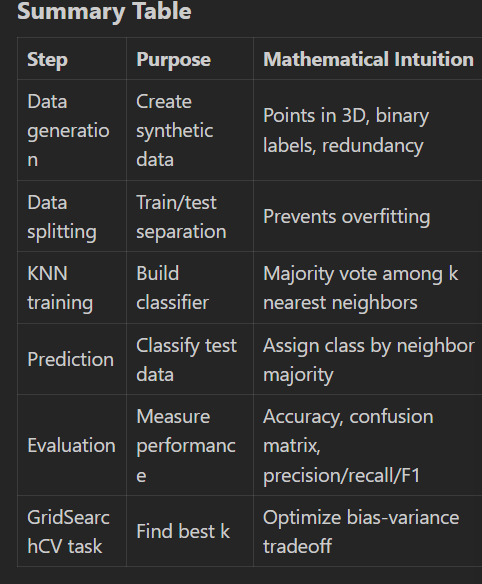

## KNN Regressor

In [13]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=2, noise=10, random_state=42)

Data generation


Meaning:

Imports the make_regression function to generate synthetic regression data.
n_samples=1000: Creates 1000 data points (rows).
n_features=2: Each data point has 2 features (columns).
noise=10: Adds random noise to the output, making the regression problem more realistic.
random_state=42: Ensures reproducibility.
Purpose:
To create a synthetic dataset for demonstrating KNN regression.

Mathematical Intuition:
Each row in X is a point in 2D space, and y is a continuous target value generated as a linear combination of the features plus some noise.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

Splitting the data


Meaning:

Imports the function to split data into training and testing sets.
test_size=0.33: 33% of the data is used for testing, 67% for training.
random_state=42: Ensures the split is reproducible.
Purpose:
To train the model on one part of the data and evaluate it on another, ensuring a fair assessment.

Mathematical Intuition:
Prevents overfitting by evaluating the model on data it hasn't seen during training.

In [15]:
from sklearn.neighbors import KNeighborsRegressor

Importing and Training the KNN Regressor


Meaning:

Imports the KNN regressor class.
n_neighbors=6: For each prediction, the regressor will look at the 6 nearest neighbors in the training data.
algorithm='auto': Lets scikit-learn choose the most appropriate algorithm for finding neighbors.
fit(X_train, y_train): Trains the regressor using the training data.
Purpose:
To build a KNN regression model that predicts the target value for new data points based on the average of their 6 nearest neighbors.

Mathematical Intuition:
For a new point, the algorithm:

Computes the distance (usually Euclidean) to all training points.
Finds the 6 closest points.
Predicts the output as the average of the target values of these 6 neighbors.

In [16]:
regressor=KNeighborsRegressor(n_neighbors=6,algorithm='auto')
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [17]:
y_pred=regressor.predict(X_test)

Making predictions


Meaning:
Predicts the target values for the test set using the trained KNN regressor.

Purpose:
To evaluate how well the model generalizes to new, unseen data.

Mathematical Intuition:
For each test sample, the predicted value is the mean of the target values of its 6 nearest neighbors in the training set.

In [18]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

Importing Regression Metrics


Meaning:
Imports three metrics for evaluating regression models:

r2_score: Coefficient of determination (how well predictions approximate actual values).
mean_absolute_error: Average absolute difference between predicted and actual values.
mean_squared_error: Average squared difference between predicted and actual values.
Purpose:
To quantitatively assess the performance of the regression model.

In [19]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9189275159979495
9.009462452972217
127.45860414317289


Meaning:

Prints the R² score: 1.0 is perfect prediction, 0.0 means the model predicts no better than the mean, negative values mean worse than the mean.
Prints the mean absolute error (MAE): Lower is better; 0 means perfect prediction.
Prints the mean squared error (MSE): Lower is better; penalizes larger errors more than MAE.
Purpose:
To understand how accurately the KNN regressor predicts the target values.

Mathematical Intuition:

R² Score:
[ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} ] Measures the proportion of variance explained by the model.
MAE:
[ \text{MAE} = \frac{1}{n} \sum |y_i - \hat{y}_i| ] Average absolute error.
MSE:
[ \text{MSE} = \frac{1}{n} \sum (y_i - \hat{y}_i)^2 ] Average squared error.

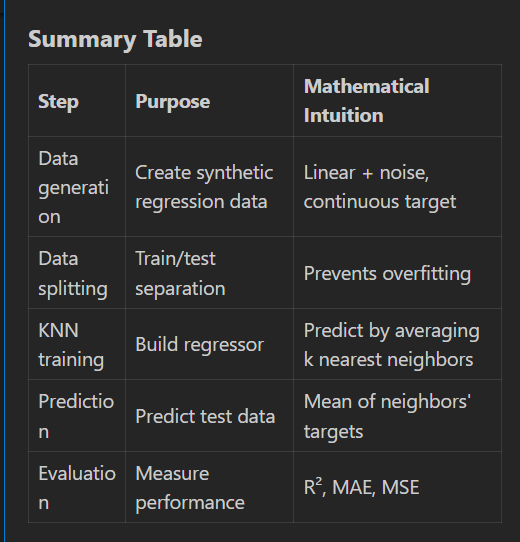